[Return to NeoPZ-Overview](NeoPZ-Overview.ipynb)

## 3. Shape Function <a id="shape"></a>

The origin of the NeoPZ library was an object oriented framework for hp adaptive finite element simulations using continuous H1 approximation spaces.

The shape template classes define shape functions of arbritrary order for all element topologies.

Shape functions are associated with sides and the polynomial order of the shape functions and it can be choosen arbitrarely with each side.

High order shape functions are computed as the product of a bubble function with an orthogonal polynomial.

### 3.1. Choice of family of orthogonal polynomials

The template class *TPZShapeLinear* has a static function pointer *fOrthogonal* that defines the family of orthogonal polynoms that will be used when computing shape functions.

By default, *fOrthogonal* points to the static function *Chebyshev* which implements the orthogonal Chebyshev polynomials.

Other orthogonal polynomials are

 
* Legendre
* Hermite
* Jacobi
* Monomial polynomials $x^n$

### 3.2. Computing shape functions in the NeoPZ environment

Given a point $\xi$ at the interior of an element, the shape functions associated
with a side $s$ of the element topology are computed as:


 
1. Project the point $\xi$ to the point $\xi_s$ associated with the side 

$\xi_{s}=T^{s}(\xi)$;

2. Transform the point according to the transformation id of the side (the transformation id is determined by the $IDs$ of the nodes) 

$\xi_{st}=T^{st}=T^{st}(T^{st}(\xi))$;

3. Compute the internal shape functions for the point 

$\xi_{st}:\phi_{s}(\xi_{st}),  \nabla_{st} \phi_{st}(\xi_{st})$;

4. Multiply the shape functions with the bubble function associated with the side:

$\phi_{bs}(\xi),  \nabla \phi_{bs}(\xi)$

$\phi_{s}(\xi),  \phi_{s}(\xi_{st})\phi_{bs}(\xi)$

$\nabla_{\xi}\phi_{s}(\xi)=\phi_{bs}(\xi)\cdot (\nabla T^{s})^{T}(\nabla T^{s})^{T}\nabla_{st} \phi(\xi_{st})+\phi_{s}(\xi_{st})\cdot\nabla \phi_{bs}(\xi)$


The transformations $T^{st}$ and $T^s$ are homogeneous and have therefore constant
Jacobian. The functions $\phi_{bs}(\xi)$ are bubble functions associated with each side
and are computed in the method ShapeGenerating. The projection $T^s$ is unique
for each side. The transformation $T^s$ is a function of the ids of the geometric
nodes associated with the side.

#### 3.2.1. Shape function count

An essential part of computing the shape functions is to know how many shape functions are associated with each side. Two methods return the number of shape functions
* static int *NConnectShapeF(int side, int order)*:
Computes the number of shape functions associated with a side
* static int *NShapeF(TPZVec<int> \& order)*:
    Sum of shape functions for a given order associated with each side. The order vector has the dimension *NSides-NCornerNodes*

#### 3.2.2. Corner shape functions

The shape functions associated with corner nodes are the traditional linear or bilinear shape functions. 
(For the pyramid topology, the linear shape functions are rational functions.)

#### 3.2.3. ShapeGenerating

A bubble function associated with a side is computed as the multiplication of linear combinations of the corner shape functions.

A bubble function associated with a side is nonzero over the side and all higher dimensional sides whose closure contains the side.

A bubble function associated with a side is zero on all lower dimensional sides include in the closure of the side.

The bubble functions are constructed to that they have minimal polynomial order and fullfill the above requirements. 

The method ShapeGenerating which is defined in all shape templates takes as entry the values of the shape functions and derivatives at the corner nodes and returns the values of the bubble functions and their derivatives.

#### 3.2.4. ShapeInternal
ShapeInternal computes the internal functions associated with the topology of a side.

static void ShapeInternal(TPZVec<REAL> &x, int order, TPZFMatrix<REAL> &phi, TPZFMatrix<REAL> &dphi, int quad_transformation_index);
    
Its arguments are the coordinate of the projected point in the master element of the side, the transformation id associated with the side and its output are the values of the shape functions $\phi(\xi_{st})$ and gradient  $(\nabla T^{st})^T \nabla_{st} \phi_{st}(\xi_{st})$

### 3.3 Examples

Pyvista is undergoing some development. The iterative plots are not able to show scalar bars, axes grids, etc. For more info see this [issue](https://github.com/pyvista/pyvista-support/issues/64#issuecomment-535564880)

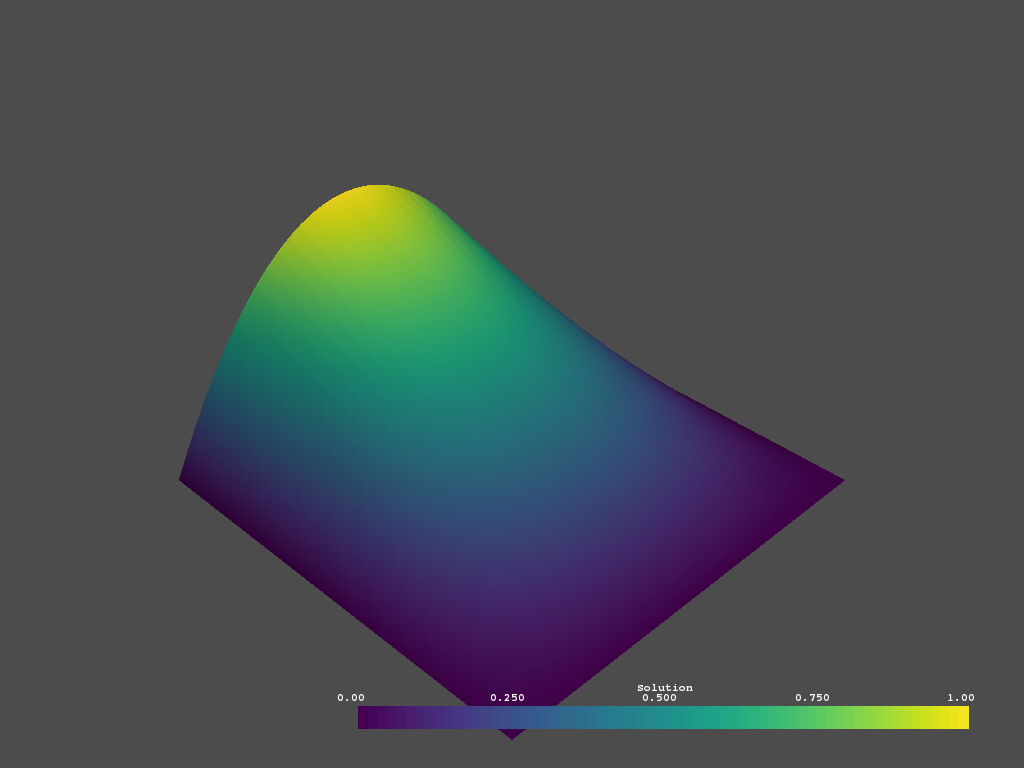

In [2]:
import pyvista as pv
mesh = pv.UnstructuredGrid('Shapes VTK/elementFunc.vtk8.scal_vec.0.vtk').warp_by_scalar()

# First a default plot with jet colormap
p = pv.Plotter()
# Add the data, use active scalar for coloring, and show the scalar bar
p.add_mesh(mesh)
# Display the scene
p.show(use_panel=False)

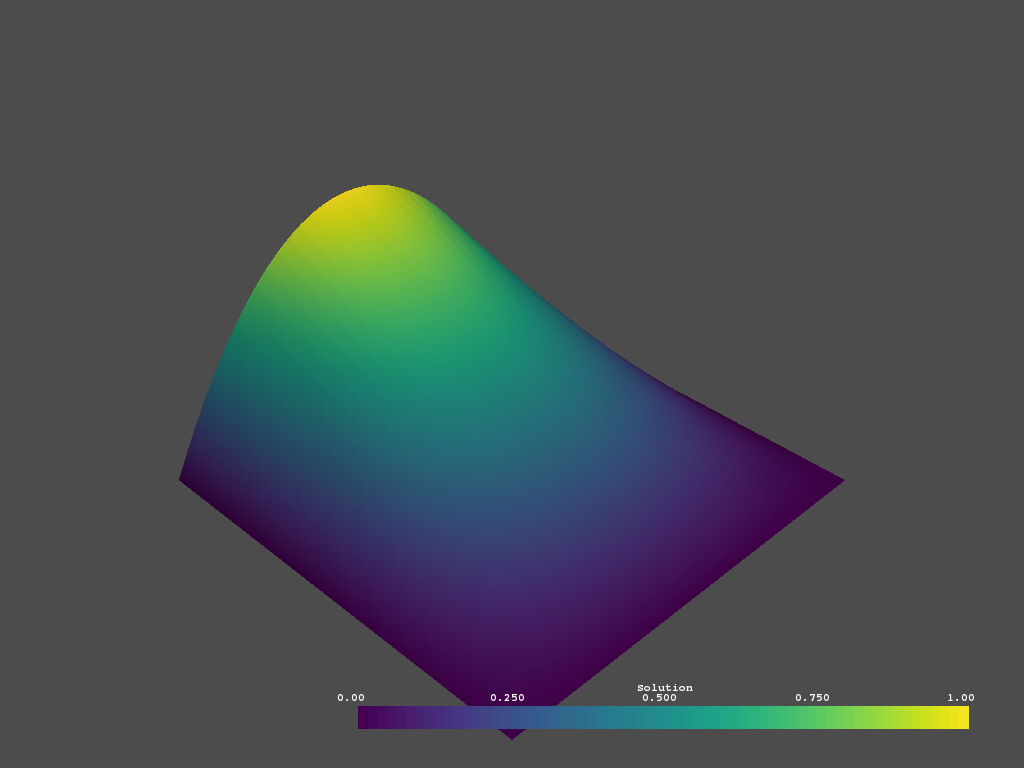

In [3]:
# First a default plot with jet colormap
p = pv.Plotter()
# Add the data, use active scalar for coloring, and show the scalar bar
p.add_mesh(mesh)
# Display the scene
p.show()

In [6]:
# Please before running this code install mayavi

# from mayavi import mlab
# from mayavi.modules.surface import Surface

# from mayavi import mlab


# file_name = "Shapes VTK/elementFunc.vtk2.scal_vec.0.vtk"  # minimal example vtk file

# mlab.init_notebook()
# fig = mlab.figure()
# engine = mlab.get_engine()

# vtk_file_reader = engine.open(file_name)

# surface = Surface()
# engine.add_filter(surface, vtk_file_reader)
# mlab.colorbar()

# fig

In [5]:
# file_name = "Shapes VTK/elementFunc.vtk8.scal_vec.0.vtk"  # minimal example vtk file

# mlab.init_notebook()
# fig = mlab.figure()
# engine = mlab.get_engine()

# vtk_file_reader = engine.open(file_name)

# surface = Surface()
# engine.add_filter(surface, vtk_file_reader)
# mlab.colorbar()

# fig